# **👑DATA SCHOOL TEAM PROJECT**  
**┗ 고객획득비용(CAC) 분석을 통한 광고 전략 최적화**
---
> **목차(Context)**

* 프로젝트 Summary
* 문제상황 Introduction
* 데이터 전처리
* Process 1: 데이터 EDA
* Process 2: CAC 분석
* Process 3: KPIs 분석


## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 고객획득비용(CAC) 분석을 통한 광고 전략 최적화
```  

> **프로젝트유형**

```
▶ 데이터 EDA
▶ CAC 분석
▶ 시계열 분석
▶ 룰베이스 알고리즘 예측
```

> **학습목표**

```
▶ 추출한 유용한 정보를 시각화하는 능력 향상
▶ 인사이트 도출 능력 향상
▶ CAC 분석 능력 향상
▶ 이커머스 KPI 지표 이해와 활용
```

> **예상 결과물**

```
▶ 최적화된 광고 전략
▶ KIP와 광고의 관계에 대한 인사이트
```

## **문제상황 Introduction**
---
> **시나리오**

```
최근 이커머스에서 광고의 중요성은 점점 높아지고 있다.
고객획득비용을 분석하면 얼마나 광고비를 사용해야 하는지 견적을 낼 수 있다.
한발 더 나아가 KPIs에 많이 기여하는 고객들에게 최적화된 광고 전략을 세우고자 한다.
```  

> **문제정의**

```
이커머스 기업의 광고 전략 부재
```  

> **기대효과**

```
효율적이고 효과적인 광고로 KPIs 상승
```

> **해결방안**

```
고객획득비용(CAC) 분석을 통한 광고 전략 최적화
```

> **성과측정**  

```
최적화된 광고전략 적용 전/후 KPIs 비교
```

> **데이터 살펴보기**

| Column                 | Description       |
|------------------------|-------------------|
| FSN ID          | 각 SKU의 고유 식별자          |
| Order Date               | 주문이 이루어진 날짜          |
| Year/Month        | 주문이 이루어진 연도|
|Month|주문이 이루어진 월|
|Order ID| 각 주문의 고유 식별번호|
|Order Item ID	|동시에 두 가지 다른 제품을 주문할 때 시스템이 생성하는 두 개의 다른 주문 항목 ID|
|GMV	|상품의 총 판매 가치 또는 수익|
|Units	|특정 제품이 판매된 단위 수|
|deliverybdays	|주문이 이루어진 날짜와 최종 배송일 사이의 영업일 수|
|deliverycdays	|주문이 이루어진 날짜와 최종 배송일 사이의 달력 일 수|
|Order Payment Type|	지불이 이루어진 방법(선불 또는 대금 상환)|
|SLA|	제품을 배달하는 데 일반적으로 걸리는 일 수|
|Cust id|	고객의 고유 식별자|
|pincode|	주문이 이루어진 위치의 핀 코드|
|product_analytic_super_category|	제품이 속한 슈퍼 카테고리|
|product_analytic_category|	제품이 속한 카테고리|
|product_analytic_sub_category|	제품이 속한 하위 카테고리|
|product_analytic_vertical|	제품이 속한 최대 하위 분류|
|Product MRP|	제품의 최대 소매 가격|
|Product procurement SLA|	제품을 조달하는 데 일반적으로 걸리는 시간|

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

# import os
# os.chdir('/content/drive/MyDrive')
# os.getcwd()

In [ ]:
import pandas as pd

df = pd.read_csv('ConsumerElectronics.csv')
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


## **데이터 전처리**

In [ ]:
print(df.shape)

(1648824, 20)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [ ]:
# 날짜 변환
# 매출 float로 바꾸기 (gmv)

df['order_date'] = pd.to_datetime(df['order_date'])

df['gmv'] = df['gmv'].replace(' ', '0')
df['gmv'] = df['gmv'].astype(float)

In [ ]:
df.isnull().sum()

,0
fsn_id,0
order_date,0
Year,0
Month,0
order_id,0
order_item_id,0
gmv,0
units,0
deliverybdays,0
deliverycdays,0


In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_date,1648824,2016-01-10 05:24:13.429956608,2015-05-19 13:42:09,2015-10-16 17:40:54.249999872,2016-01-07 12:39:11.500000,2016-04-01 13:12:09.500000,2016-07-25 01:19:45,NaN
Year,1648824.0,2015.518555,2015.0,2015.0,2016.0,2016.0,2016.0,0.499656
Month,1648824.0,6.58565,1.0,3.0,6.0,10.0,12.0,3.623351
order_id,1648824.0,2842444674146622.0,76331515.0,1602588503969575.0,2611824528743350.0,3610613539366250.0,5395076790260600.0,1269134332596894.25
order_item_id,1648824.0,13756277530325592.0,108016495.0,1606725138262300.0,2619185472741150.0,4397705931628400.0,300037347717704000.0,55945981798631008.0
gmv,1648824.0,2453.804126,0.0,339.0,749.0,1999.0,226947.0,5612.080621
units,1648824.0,1.022087,1.0,1.0,1.0,1.0,50.0,0.253532
sla,1648824.0,5.687832,0.0,4.0,6.0,7.0,1006.0,2.983336
product_mrp,1648824.0,4108.308611,0.0,799.0,1599.0,3499.0,299999.0,8510.917768
product_procurement_sla,1648824.0,5.403451,-1.0,1.0,2.0,3.0,1000.0,53.466182


In [ ]:
df_media = pd.read_csv('Media Investment.csv')  # 광고 및 투자 내역
df_nps = pd.read_csv('NPS_Stockindex.csv')  # NPS(고객충성도 지표), Stock Index(주가 지수) 정보
df_promo = pd.read_csv('Special_Sale_Calendar.csv')  # 마케팅 프로모션 기간 정보

In [ ]:
print(df_media.shape)
df_media.head(12)

(12, 12)


,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
0,2015,7,17.1,0.2,2.5,7.4,0.0,1.3,0.5,5.0,0.0,0.0
1,2015,8,5.1,0.0,1.3,1.1,0.0,0.1,0.1,2.5,0.0,0.0
2,2015,9,96.3,3.9,1.4,62.8,0.6,16.4,5.0,6.2,0.0,0.0
3,2015,10,170.2,6.1,12.6,84.7,3.4,24.4,7.0,31.9,0.0,0.0
4,2015,11,51.2,4.2,1.3,14.2,0.2,19.6,6.6,5.2,0.0,0.0
5,2015,12,106.7,5.4,3.1,56.7,1.1,22.5,6.8,11.2,0.0,0.0
6,2016,1,74.2,4.4,0.5,4.2,0.9,22.9,7.4,4.2,2.7,27.1
7,2016,2,48.1,2.6,1.9,11.7,0.6,19.9,6.5,4.9,0.0,0.0
8,2016,3,100.0,9.3,2.1,41.6,0.4,18.4,6.2,5.2,0.9,15.9
9,2016,4,56.8,5.2,0.9,24.3,0.0,16.5,5.7,4.2,0.0,0.0


In [ ]:
print(df_nps.shape)
df_nps.head(10)

(2, 13)


,index,July'15,Aug'15,Sept'15,Oct'15,Nov'15,Dec'15,Jan'16,Feb'16,Mar'16,Apr'16,May'16,June'16
0,NPS,54.6,60.0,46.9,44.4,47.0,45.8,47.1,50.3,49.0,51.8,47.3,50.5
1,Stock Index,1177.0,1206.0,1101.0,1210.0,1233.0,1038.0,1052.0,1222.0,1015.0,1242.0,1228.0,1194.0


In [ ]:
print(df_promo.shape)
df_promo.head(10)

(6, 2)


,2015,2016
0,(18-19th July),(20-22 Jan)
1,(15-17th Aug),(1-2 Feb)
2,(28-30th Aug),(20-21 Feb)
3,(15-17th Oct),(14-15 Feb)
4,(7-14th Nov),(7-9 Mar)
5,(25th Dec'15 - 3rd Jan'16),(25-27 May)


In [ ]:
print(df_media.isnull().sum())
print(df_nps.isnull().sum())
print(df_promo.isnull().sum())

Year                 0
Month                0
Total Investment     0
TV                   0
Digital              0
Sponsorship          0
Content Marketing    0
Online marketing     0
 Affiliates          0
SEM                  0
Radio                0
Other                0
dtype: int64
index      0
July'15    0
Aug'15     0
Sept'15    0
Oct'15     0
Nov'15     0
Dec'15     0
Jan'16     0
Feb'16     0
Mar'16     0
Apr'16     0
May'16     0
June'16    0
dtype: int64
2015    0
2016    0
dtype: int64


In [ ]:
df_media.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,12.0,2015.500000,0.522233,2015.0,2015.000,2015.50,2016.000,2016.0
Month,12.0,6.500000,3.605551,1.0,3.750,6.50,9.250,12.0
Total Investment,12.0,70.550000,44.533736,5.1,46.775,65.50,97.225,170.2
TV,12.0,3.700000,2.688021,0.0,1.625,4.05,5.250,9.3
Digital,12.0,2.483333,3.270205,0.5,1.200,1.40,2.200,12.6
Sponsorship,12.0,30.450000,26.232301,1.1,10.625,24.65,45.375,84.7
Content Marketing,12.0,0.666667,0.944201,0.0,0.000,0.50,0.825,3.4
Online marketing,12.0,16.141667,8.456892,0.1,14.300,19.00,22.600,24.4
Affiliates,12.0,5.116667,2.556928,0.1,4.450,6.35,6.800,7.4
SEM,12.0,7.591667,7.953325,2.5,4.200,5.10,6.375,31.9


In [ ]:
df_nps.describe().T

,count,mean,std,min,25%,50%,75%,max
July'15,2.0,615.80,793.656651,54.6,335.200,615.80,896.400,1177.0
Aug'15,2.0,633.00,810.344371,60.0,346.500,633.00,919.500,1206.0
Sept'15,2.0,573.95,745.361258,46.9,310.425,573.95,837.475,1101.0
Oct'15,2.0,627.20,824.203664,44.4,335.800,627.20,918.600,1210.0
Nov'15,2.0,640.00,838.628642,47.0,343.500,640.00,936.500,1233.0
Dec'15,2.0,541.90,701.591348,45.8,293.850,541.90,789.950,1038.0
Jan'16,2.0,549.55,710.571604,47.1,298.325,549.55,800.775,1052.0
Feb'16,2.0,636.15,828.517016,50.3,343.225,636.15,929.075,1222.0
Mar'16,2.0,532.00,683.065151,49.0,290.500,532.00,773.500,1015.0
Apr'16,2.0,646.90,841.598491,51.8,349.350,646.90,944.450,1242.0


In [ ]:
df_promo.describe().T

,count,unique,top,freq
2015,6,6,(18-19th July),1
2016,6,6,(20-22 Jan),1


## **Process 1: 데이터 EDA**

In [ ]:
cols_categorical = df.select_dtypes(include=object).columns
cols_numerical = df.select_dtypes(exclude=object).columns

In [ ]:
# 제품 분류와 관련된 세개의 값을 분석한다.
# product_analytic_category, product_analytic_sub_category, product_analytic_vertical
# 나머지 카테고리컬을 사용할 경우 추가로 전처리를 해야한다.

for col in cols_categorical:
  print(f'{col}: {df[col].nunique()}')

h_categories = df['product_analytic_category'].unique()
m_categories = df['product_analytic_sub_category'].unique()
l_categories = df['product_analytic_vertical'].unique()

fsn_id: 21219
deliverybdays: 143
deliverycdays: 171
s1_fact.order_payment_type: 2
cust_id: 1253495
pincode: 12973
product_analytic_super_category: 1
product_analytic_category: 5
product_analytic_sub_category: 14
product_analytic_vertical: 74


### **제품종류별 분석**

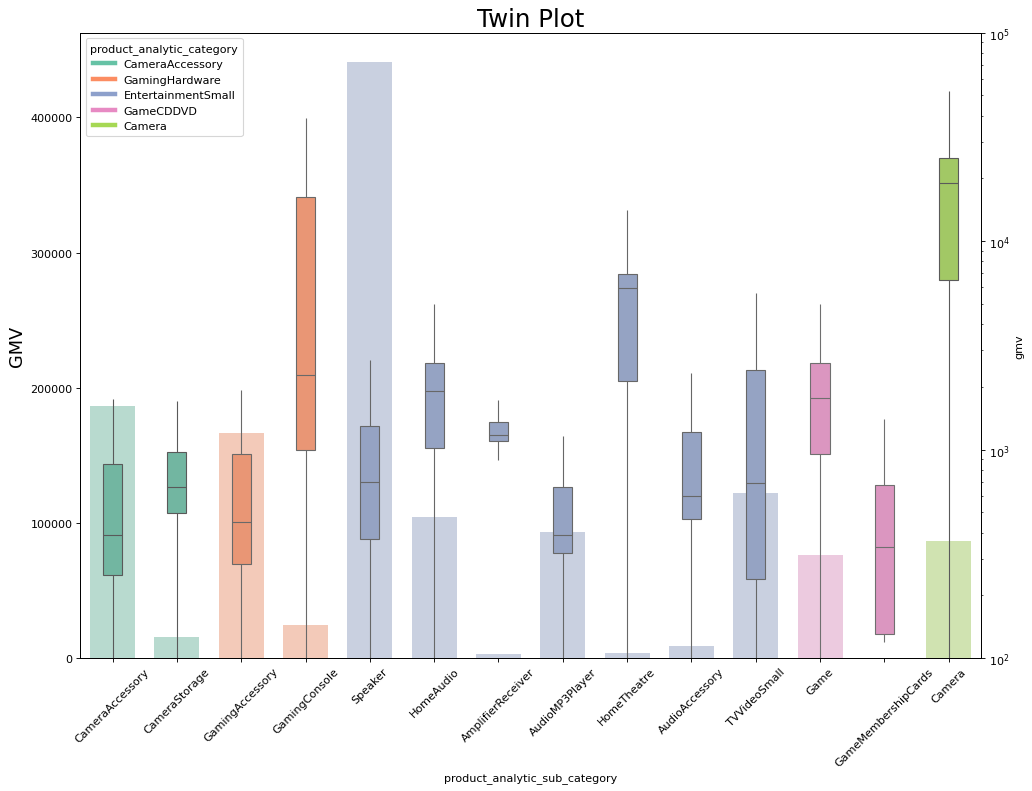

In [ ]:
# 제품종류별 고객수 vs 매출
# 고객수: EntertainmentSmall이 유독 많은 편이며, 그중에서 특히 스피커가 많다.
# 매출: 카메라, 홈시어터, 게이밍콘솔이 가장 큰 기여를 한다.
# 상대적으로 고객수가 적어도 매출이 높은 경우가 있다.

# 여기서 단가에 따른 군집을 설정하는 것도 나쁘지 않아 보인다.
# (ex. 높은단가, 중간단가, 낮은단가)

df_temp = df.copy()
col1 = 'product_analytic_category'
col2 = 'product_analytic_sub_category'

unique_categories = df_temp[col1].unique()
palette = sns.color_palette("Set2", len(unique_categories))
category_colors = dict(zip(unique_categories, palette))

df_temp['total_cust_id'] = df_temp.groupby([col1, col2])['cust_id'].transform('nunique')

fig, ax1 = plt.subplots(figsize=(13, 10), dpi=80)
for category in unique_categories:
    sub_df = df_temp[df_temp[col1] == category]
    sns.barplot(
        x=col2, y='total_cust_id', data=sub_df,
        color=category_colors[category],
        ci=None, ax=ax1, alpha=0.5, width=0.7
    )
ax1.set_ylabel('Cust', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2 = ax1.twinx()
for category in unique_categories:
    sub_df = df_temp[df_temp[col1] == category]
    sns.boxplot(
        x=col2, y='gmv', data=sub_df,
        color=category_colors[category],
        showcaps=False, showfliers=False, ax=ax2, width=0.3
    )
ax2.set_title('Twin Plot', fontsize=22)
ax1.set_ylabel('GMV', fontsize=16)
ax2.set_ylim(10e01, 10e04)
ax2.set_yscale('log')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

handles = [plt.Line2D([0], [0], color=color, lw=4) for color in category_colors.values()]
labels = list(category_colors.keys())
ax1.legend(handles, labels, title=col1, loc='upper left')
plt.tight_layout()
plt.show()

### **시계열**

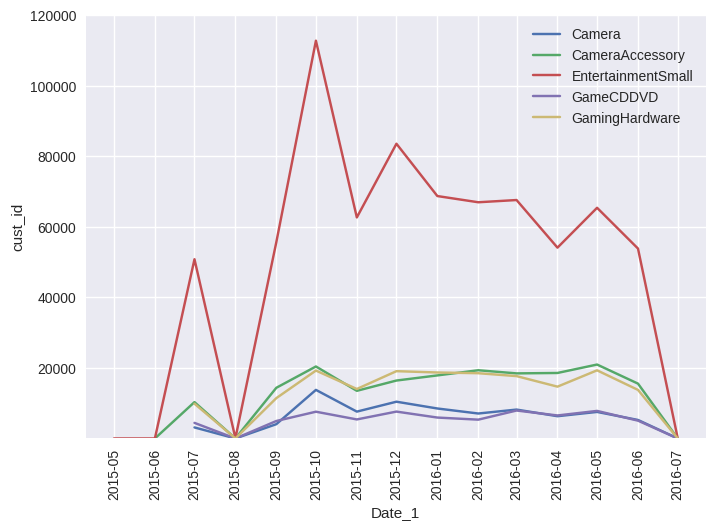

In [ ]:
# 신규고객수 라인플랏
# 고객수가 급격하게 높아지는 월이 존재한다.
# 전체적인 고객수의 추세는 제품종류별과 비슷하다.

df['Date_1'] = pd.to_datetime(df["order_date"].dt.strftime("%Y-%m"))
col = 'product_analytic_category'

df['first_order_date'] = df.groupby('cust_id')['order_date'].transform('min')
df['is_new_customer'] = df['order_date'] == df['first_order_date']

plt.style.use(['seaborn-v0_8'])
df_temp = df[df['is_new_customer']==True].groupby([col, 'Date_1'], as_index=False)['cust_id'].nunique()
sns.lineplot(x='Date_1', y='cust_id', hue=col, data=df_temp)
unique_dates = df_temp['Date_1'].sort_values().unique()
plt.xticks(ticks=unique_dates, labels=pd.to_datetime(unique_dates).strftime('%Y-%m'), rotation=90)
plt.ylim(1, 120000)
# plt.ylim(1, 10e05)
# plt.yscale('log')
plt.legend(loc='upper right')
plt.show()

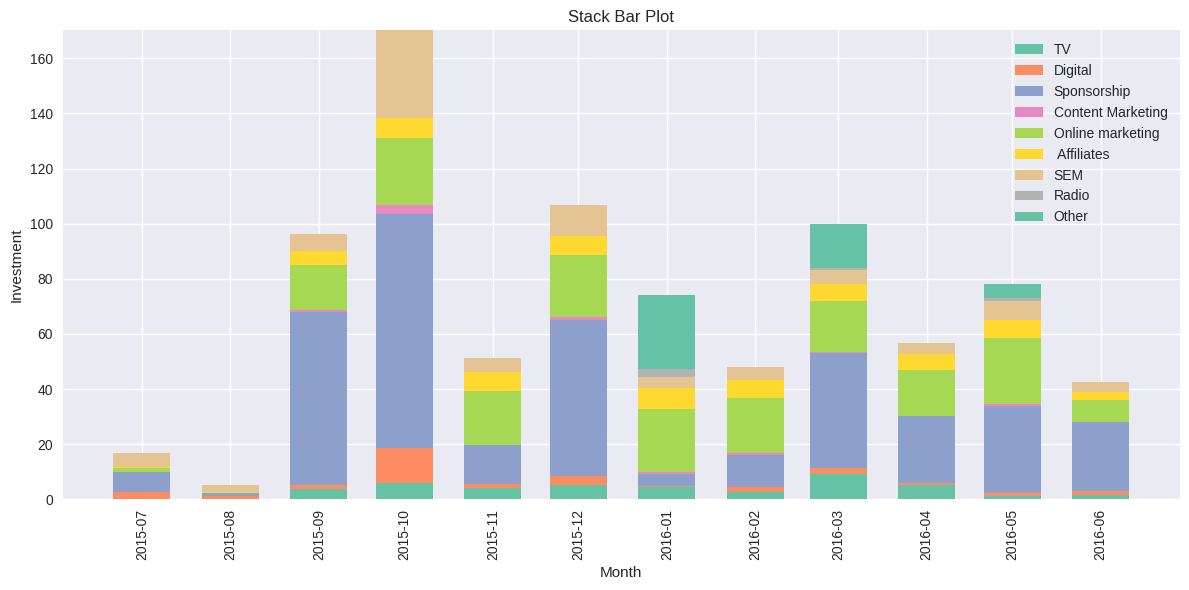

In [ ]:
# 투자비 스택바플랏
# 투자비의 추세가 고객수와 상당히 유사한 패턴을 보인다.

df_temp = df_media.copy()
df_temp['Date_1'] = pd.to_datetime(df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str))

medias = df_temp.columns.drop(['Year', 'Month', 'Date_1', 'Total Investment'])
colors = sns.color_palette("Set2", len(medias))

plt.figure(figsize=(12, 6))
bottom = None
for media, color in zip(medias, colors):
    plt.bar(df_temp["Date_1"], df_temp[media], label=media, bottom=bottom, color=color, width=20)
    bottom = df_temp[media] if bottom is None else bottom + df_temp[media]
plt.title("Stack Bar Plot")
plt.ylabel("Investment")
plt.xlabel("Month")
unique_dates = df_temp['Date_1'].sort_values().unique()
plt.xticks(ticks=unique_dates, labels=pd.to_datetime(unique_dates).strftime('%Y-%m'), rotation=90)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

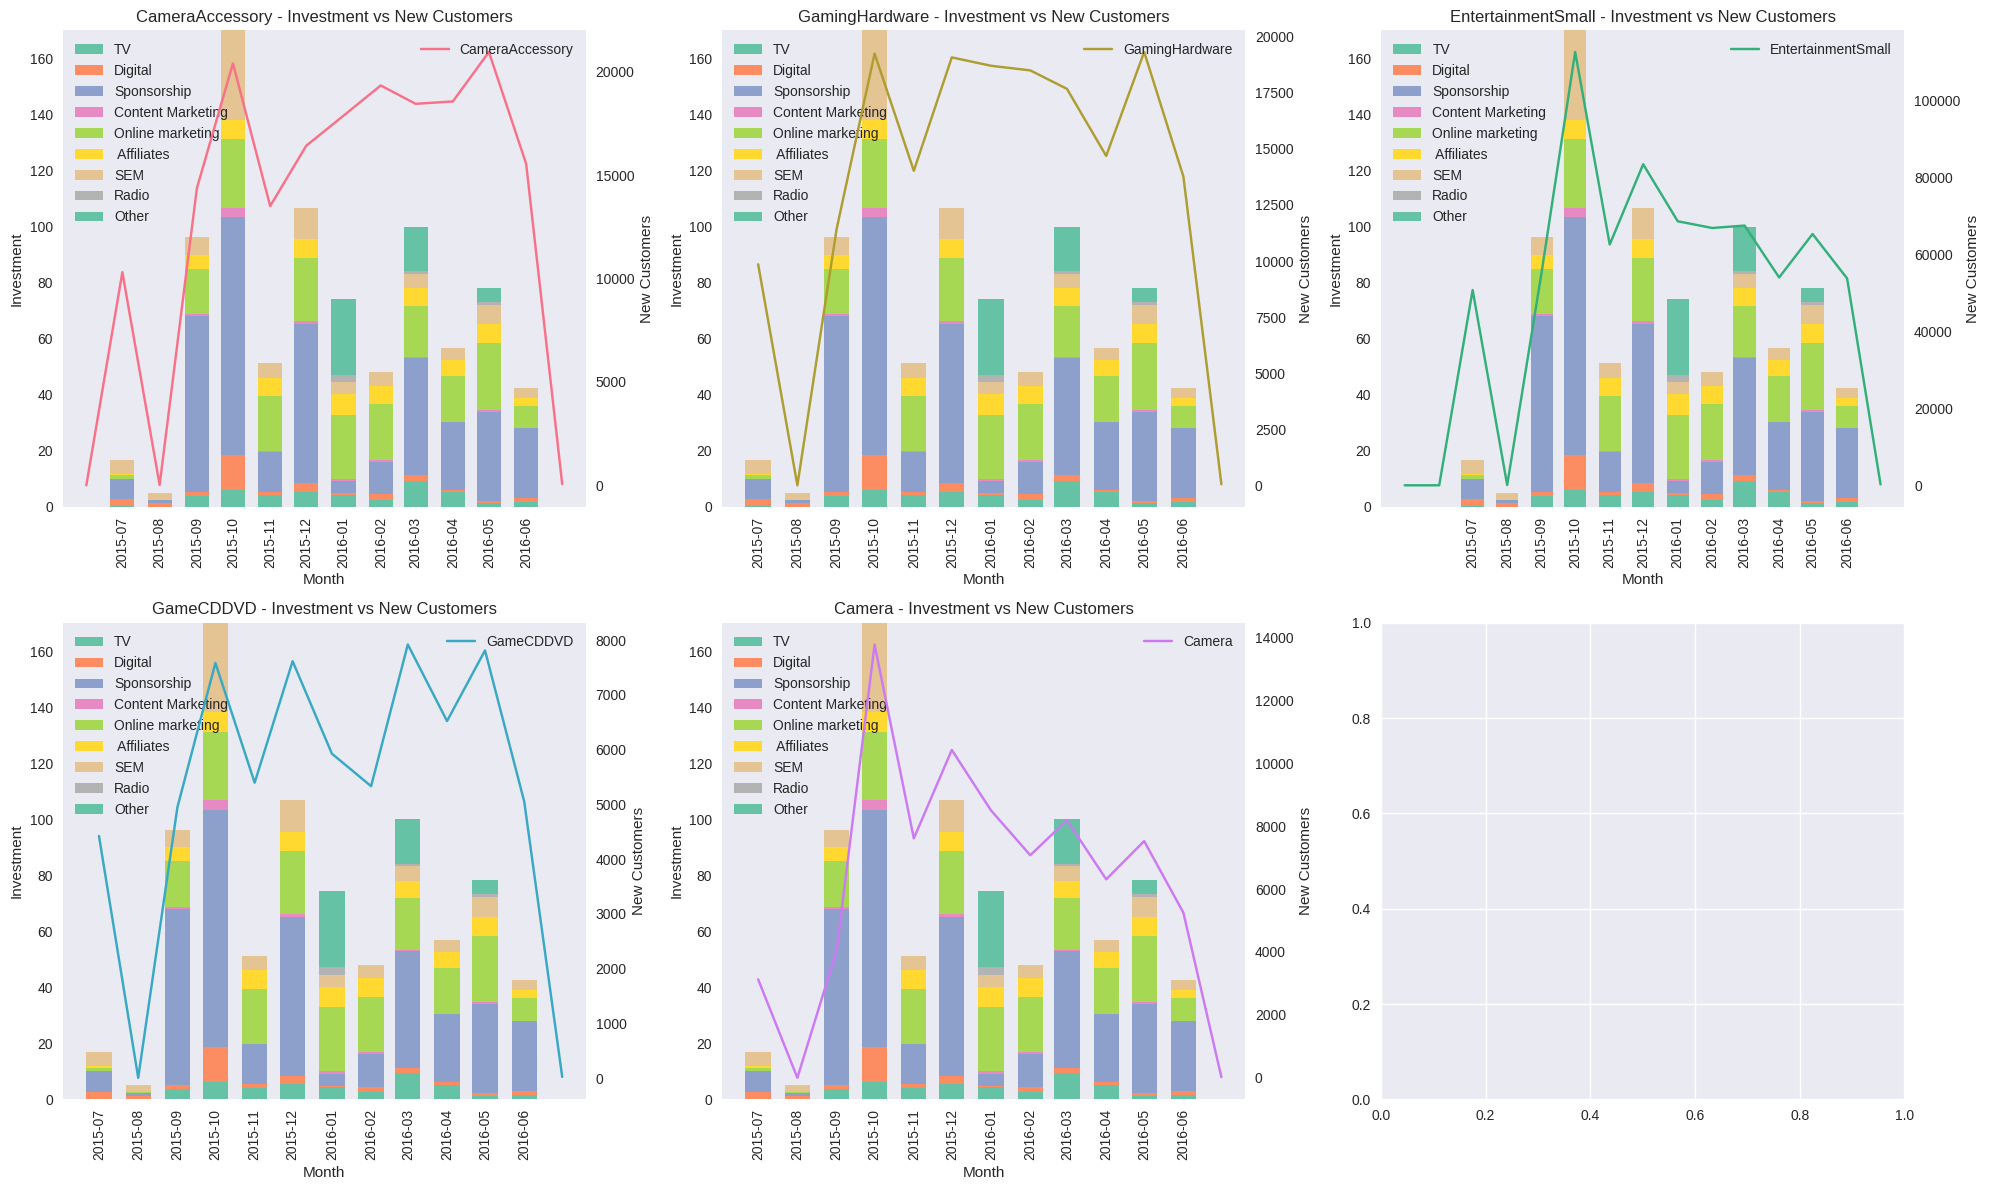

In [ ]:
# 시계열 제품종류별 신규고객 vs 투자비
# 모든 제품종류가 투자비와 상관관계가 있는 것으로 보인다.
# 특히 매출에 가장 큰 기여를 하는 카메라의 경우 큰 상관관계가 있는 것으로 보인다.

df_temp = df_media.copy()
df_temp['Date_1'] = pd.to_datetime(df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str))
medias = df_temp.columns.drop(['Year', 'Month', 'Date_1', 'Total Investment'])
colors = sns.color_palette("Set2", len(medias))

df['Date_1'] = pd.to_datetime(df["order_date"].dt.strftime("%Y-%m"))
col = 'product_analytic_category'
df['first_order_date'] = df.groupby('cust_id')['order_date'].transform('min')
df['is_new_customer'] = df['order_date'] == df['first_order_date']
cats = df[col].unique()
line_colors = sns.color_palette("husl", len(cats))

n = len(cats)
fig, axs = plt.subplots(2, (n + 1) // 2, figsize=(20, 4 * (n + 1) // 2))
axs = axs.flatten()

for i, cat in enumerate(cats):
    ax1 = axs[i]
    ax2 = ax1.twinx()

    bottom = None
    for media, color in zip(medias, colors):
        ax1.bar(df_temp["Date_1"], df_temp[media], label=media, bottom=bottom, color=color, width=20)
        bottom = df_temp[media] if bottom is None else bottom + df_temp[media]
    ax1.set_title(f"{cat} - Investment vs New Customers")
    ax1.set_ylabel("Investment")
    ax1.set_xlabel("Month")
    unique_dates = df_temp['Date_1'].sort_values().unique()
    ax1.set_xticks(unique_dates)
    ax1.set_xticklabels(pd.to_datetime(unique_dates).strftime('%Y-%m'), rotation=90)
    ax1.legend(loc="upper left")
    ax1.grid(False)

    df_temp2 = df[df['is_new_customer'] == True].groupby([col, 'Date_1'], as_index=False)['cust_id'].nunique()
    df_temp2 = df_temp2[df_temp2[col] == cat]
    sns.lineplot(x='Date_1', y='cust_id', hue=col, data=df_temp2, ax=ax2, palette=[line_colors[i]])
    ax2.set_ylabel("New Customers")
    ax2.set_xticks(unique_dates)
    ax2.set_xticklabels(pd.to_datetime(unique_dates).strftime('%Y-%m'), rotation=90)
    ax2.legend(loc="upper right")
    ax2.grid(False)

plt.tight_layout()
plt.show()

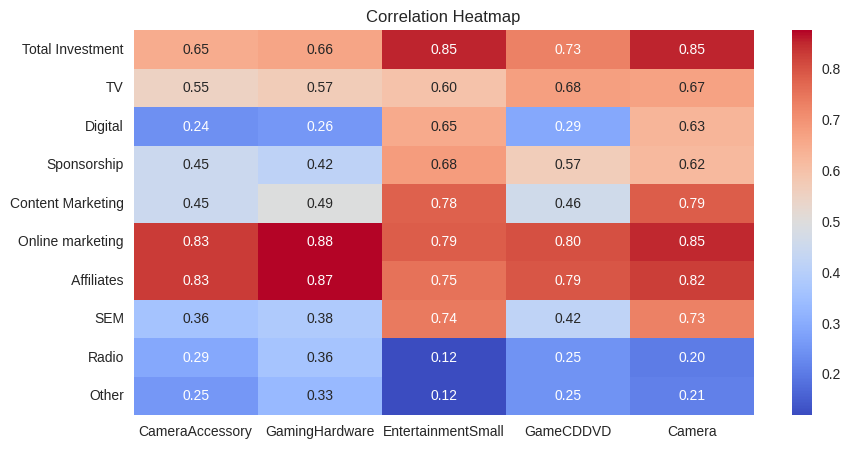

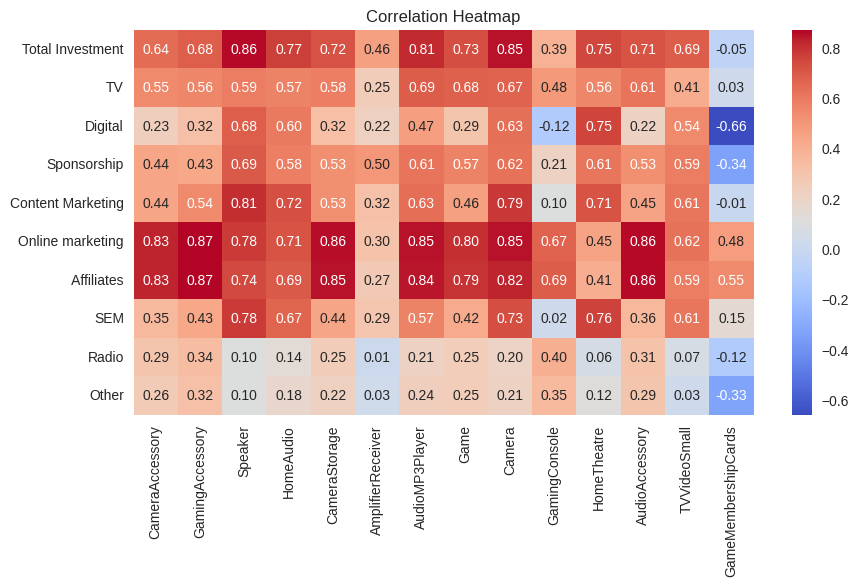

In [ ]:
# 상관계수 히트맵 제품종류별 신규고객 vs 매체별 투자비
# 제품종류 대분류 신규고객 유입량이 매체별 투자비와 상관관계가 있다.
# 히트맵을 중분류로 드릴다운할 경우 더 자세한 상관관계 정보를 얻을 수 있다.

# 광고 투자비와 신규고객의 상관관계가 보이기 때문에 CAC 분석을 진행하여 광고전략을 최적화한다.

from scipy.stats import pearsonr


df_temp = df_media.copy()
df_temp['Date_1'] = pd.to_datetime(df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str))
medias = df_temp.columns.drop(['Year', 'Month', 'Date_1'])
colors = sns.color_palette("Set2", len(medias))

cols = ['product_analytic_category', 'product_analytic_sub_category']

for col in cols:
  df['Date_1'] = pd.to_datetime(df["order_date"].dt.strftime("%Y-%m"))
  df['first_order_date'] = df.groupby('cust_id')['order_date'].transform('min')
  df['is_new_customer'] = df['order_date'] == df['first_order_date']
  cats = df[col].unique()
  df_temp2 = df[df['is_new_customer'] == True].groupby([col, 'Date_1'], as_index=False)['cust_id'].nunique()

  correlation_results = {}
  for cat in cats:
      correlations = {}
      df_cat_temp = df_temp2[df_temp2[col] == cat]
      merged_df = pd.merge(df_temp, df_cat_temp[['Date_1', 'cust_id']], on='Date_1', how='inner')
      for media in medias:
          investment = merged_df[media].values
          new_customers = merged_df['cust_id'].values
          correlation, _ = pearsonr(investment, new_customers)
          correlations[media] = correlation
      correlation_results[cat] = correlations
  correlation_df = pd.DataFrame(correlation_results)

  plt.figure(figsize=(10, 5))
  sns.heatmap(correlation_df, annot=True, cmap="coolwarm", fmt=".2f")
  plt.title("Correlation Heatmap")
  plt.show()

### **⭐️ EDA 결론**
---

> **신규고객수와 광고투자비의 상관관계**
```
시계열 분석 과정에서 신규고객수와 광고투자비의 상관관계를 발견했다.
제품종류별로 효과적인 광고매체가 있는 것으로 판단된다.
따라서, 제품종류별 CAC를 계산해 각각 어떤 광고 매체가 효과적인지 확인한다.
```

> **KPIs 분석의 필요성**
```
고객수, 매출이 높은 제품종류가 다르다.
KPIs 마다 유리한 제품종류가 다르므로 분리해서 확인이 필요하다.
따라서, 어떤 제품종류가 어떤 KPI에 유리한지 파악한다.
```

> **KPIs에 따른 광고전략 도출**
```
두가지 분석 결과를 연결하여 KPI 마다 최적화된 광고전략을 도출한다.
```


## **Process 2: CAC 분석**

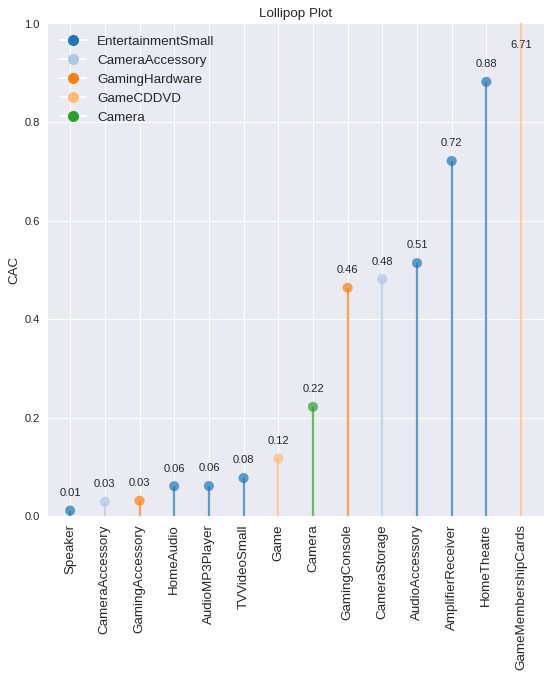

In [ ]:
# 제품종류별 획득비용 CAC 계산
# CAC = (광고투자비) / (신규고객수)
# 일단 total 투자비로 CAC 계산 후 시각화

df_temp = df_media.copy()
df_temp['Date_1'] = pd.to_datetime(df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str))
medias = df_temp.columns.drop(['Year', 'Month', 'Date_1'])

col = 'product_analytic_sub_category'
col_upper = 'product_analytic_category'
df['Date_1'] = pd.to_datetime(df["order_date"].dt.strftime("%Y-%m"))
df['first_order_date'] = df.groupby('cust_id')['order_date'].transform('min')
df['is_new_customer'] = df['order_date'] == df['first_order_date']
df_temp2 = df[df['is_new_customer'] == True].groupby([col, 'Date_1'], as_index=False)['cust_id'].nunique()

merged_df = pd.merge(df_temp, df_temp2[['Date_1', col, 'cust_id']], on='Date_1', how='inner')

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.groupby([col], as_index=False).mean()
df_unique = df[[col, col_upper]].drop_duplicates()
df_cac = pd.merge(df_cac, df_unique[[col, col_upper]], on=col, how='inner')
df_cac = df_cac[[col, col_upper, 'Total Investment']].drop_duplicates()
df_cac = df_cac.sort_values(by='Total Investment', ascending=True)

unique_categories = df_cac[col_upper].unique()
color_map = {category: plt.cm.tab20(i) for i, category in enumerate(unique_categories)}
colors = df_cac[col_upper].map(color_map)

fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.vlines(x=df_cac[col], ymin=0, ymax=df_cac['Total Investment'], color=colors, alpha=0.7, linewidth=2)
ax.scatter(x=df_cac[col], y=df_cac['Total Investment'], s=75, color=colors, alpha=0.7)
ax.set_title('Lollipop Plot', fontdict={'size': 12})
ax.set_ylabel('CAC', fontdict={'size': 12})
ax.set_xticks(df_cac[col])
ax.set_xticklabels(df_cac[col], rotation=90, fontdict={'size': 12})
ax.set_ylim(0, 1)
for i, t in enumerate(df_cac['Total Investment']):
    ax.text(i, min(t + 0.03, 0.95), s=round(t, 2), horizontalalignment='center')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[category], markersize=10)
           for category in unique_categories]
unique_categories_list = list(unique_categories)
ax.legend(handles=handles, labels=unique_categories_list, loc='upper left', fontsize=12)
plt.show()

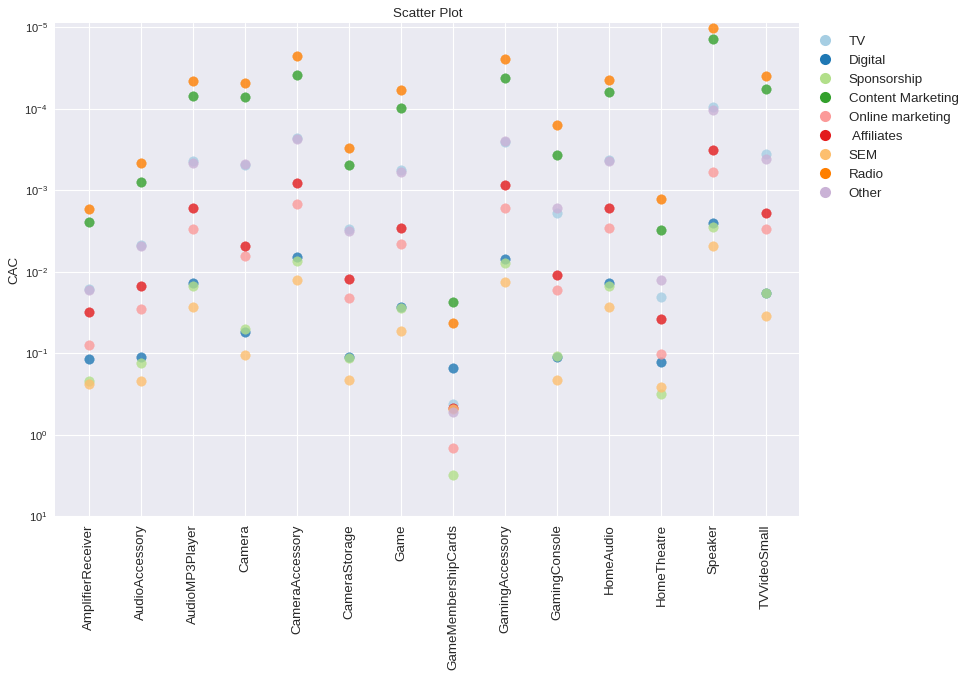

In [ ]:
# 제품종류별 획득비용 CAC 계산
# 매체별 투자비로 다시 시각화

df_temp = df_media.copy()
df_temp['Date_1'] = pd.to_datetime(df_temp['Year'].astype(str) + '-' + df_temp['Month'].astype(str))
medias = df_temp.columns.drop(['Year', 'Month', 'Date_1', 'Total Investment'])

col = 'product_analytic_sub_category'
col_upper = 'product_analytic_category'
df['Date_1'] = pd.to_datetime(df["order_date"].dt.strftime("%Y-%m"))
df['first_order_date'] = df.groupby('cust_id')['order_date'].transform('min')
df['is_new_customer'] = df['order_date'] == df['first_order_date']
df_temp2 = df[df['is_new_customer'] == True].groupby([col, 'Date_1'], as_index=False)['cust_id'].nunique()
merged_df = pd.merge(df_temp, df_temp2[['Date_1', col, 'cust_id']], on='Date_1', how='inner')

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.groupby([col], as_index=False).mean()
df_unique = df[[col, col_upper]].drop_duplicates()
df_cac = pd.merge(df_cac, df_unique[[col, col_upper]], on=col, how='inner')
df_cac = df_cac[[col, col_upper, *medias]].drop_duplicates()

color_map = {media: plt.cm.Paired(i) for i, media in enumerate(medias)}
colors = pd.Series(medias).map(color_map)

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)
for media in medias:
    ax1.scatter(x=df_cac[col], y=df_cac[media], s=75, label=media, alpha=0.8, color=color_map[media])
ax1.set_title('Scatter Plot', fontdict={'size': 12})
ax1.set_ylabel('CAC', fontdict={'size': 12})
ax1.set_xticks(df_cac[col])
ax1.set_xticklabels(df_cac[col], rotation=90, fontdict={'size': 12})
ax1.set_ylim(10e0, 9e-6)
ax1.set_yscale('log')
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[media], markersize=10)
           for media in medias]
ls_medias = list(medias)
ax1.legend(handles=handles, labels=ls_medias, loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))
plt.show()

## **Process 3: KPIs 분석**

### GMV

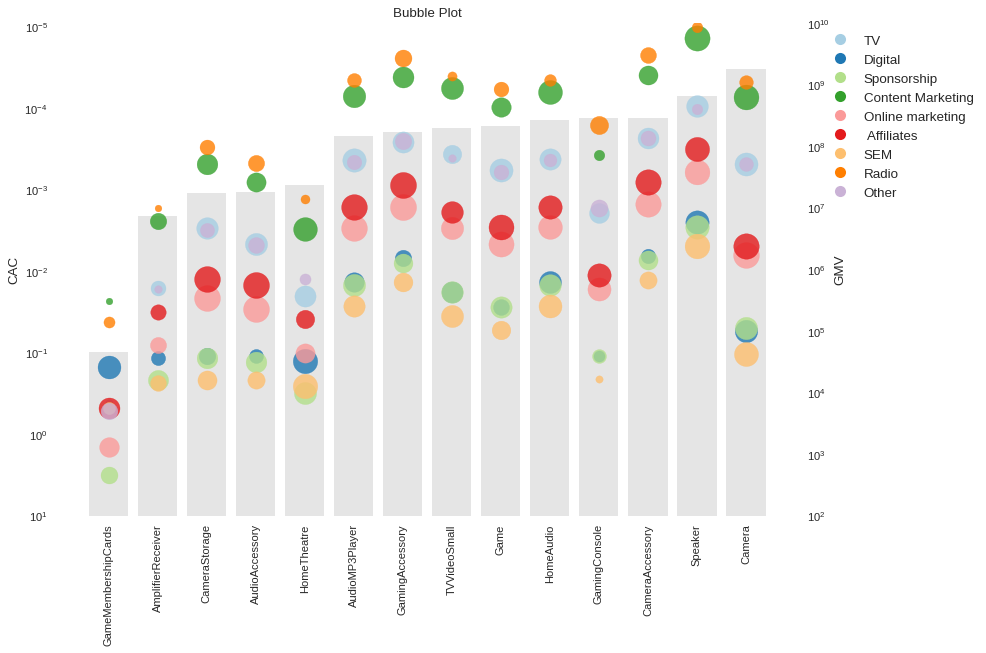

In [ ]:
# 4대 KPIs 중 매출 넣기
# x축 연동해서 넣고 높은순 정렬
# 닷 사이즈를 상관계수로 변경하기

# 매출에 가장 큰 기여를 하는 제품종류는 카메라 이다.
# 카메라에서 CAC가 낮은 광고는 라디오 이다.
# 하지만, 상관계수를 고려했을 때 콘텐츠 마케팅이 더 적절하다.
# 따라서 매출에 가장 효과적이면서 효율적인 광고는 '카메라, 콘텐츠 마케팅' 이다.

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.groupby([col], as_index=False).mean()
df_unique = df[[col, col_upper]].drop_duplicates()
df_cac = pd.merge(df_cac, df_unique[[col, col_upper]], on=col, how='inner')

df_gmv = df.groupby([col], as_index=False)['gmv'].sum()
df_cac = pd.merge(df_cac, df_gmv[[col, 'gmv']], on=col, how='inner')
df_cac = df_cac[[col, col_upper, 'gmv', *medias]].drop_duplicates()
df_cac = df_cac.sort_values(by='gmv', ascending=True)

correlation_results = {}
for cat in cats:
    correlations = {}
    df_cat_temp = df_temp2[df_temp2[col] == cat]
    df_cat_temp = pd.merge(df_temp, df_cat_temp[['Date_1', 'cust_id']], on='Date_1', how='inner')
    for media in medias:
        investment = df_cat_temp[media].values
        new_customers = df_cat_temp['cust_id'].values
        correlation, _ = pearsonr(investment, new_customers)
        correlations[media] = correlation
    correlation_results[cat] = correlations

df_corr = pd.DataFrame(correlation_results)
df_corr = df_corr.stack().reset_index()
df_corr.columns = ['Media', 'Category', 'Correlation']

color_map = {media: plt.cm.Paired(i) for i, media in enumerate(medias)}
colors = pd.Series(medias).map(color_map)

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)
ax1.bar(x=df_cac[col], height=df_cac['gmv'], color='gray', alpha=0.2)
ax1.set_ylabel('GMV', fontdict={'size': 12})
ax1.set_ylim(10e01, 10e09)
ax1.set_yscale('log')
ax1.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
for media in medias:
    for sub_category in df_cac[col].unique():
        sub_category_data = df_cac[df_cac[col] == sub_category]
        correlation_value = df_corr[(df_corr['Category'] == sub_category) & (df_corr['Media'] == media)]['Correlation'].values[0]
        marker_size = 30 + (abs(correlation_value) * 600)
        ax2.scatter(x=[sub_category] * len(sub_category_data),
                    y=sub_category_data[media],
                    s=marker_size,
                    label=f"{sub_category} - {media}",
                    alpha=0.8,
                    color=color_map[media])
ax2.set_title('Bubble Plot', fontdict={'size': 12})
ax2.set_ylabel('CAC', fontdict={'size': 12})
ax2.set_xticks(df_cac[col])
ax2.set_xticklabels(df_cac[col], rotation=90, fontdict={'size': 12})
ax2.set_ylim(10e0, 9e-6)
ax2.set_yscale('log')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[media], markersize=10)
           for media in medias]
ls_medias = list(medias)
ax1.legend(handles=handles, labels=ls_medias, loc='upper left', fontsize=12, bbox_to_anchor=(1.02, 1))
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.show()

### 재구매율

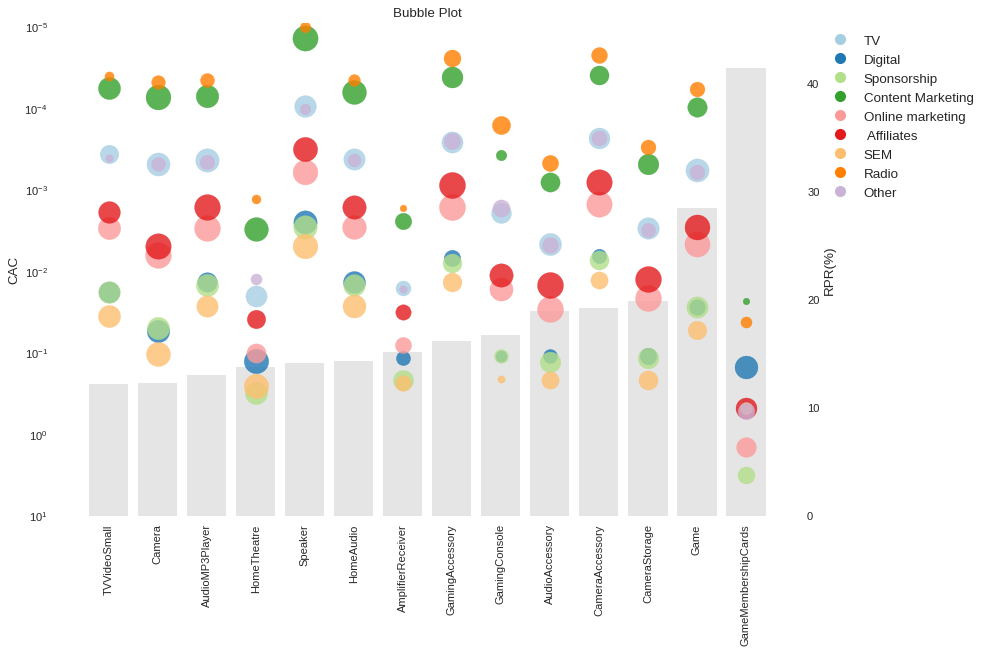

In [ ]:
# 4대 KPIs 중 재구매율 넣기
# (재구매한 고객수) / (전체 고객수) * 100

# 재구매율에 가장 큰 기여를 하는 제품종류는 게임 멤버쉽 카드 이다.
# 하지만, 게임 멤버쉽의 CAC가 다른 카테고리에 비해 현저하게 낮으므로 2번째인 게임이 적절하다.
# 게임에서 CAC가 낮은 광고는 라디오 이다.
# 하지만, 상관계수를 고려했을 때 콘텐츠 마케팅이 더 적절하다.
# 따라서 재구매율에 가장 효과적이면서 효율적인 광고는 '게임, 콘텐츠 마케팅' 이다.

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.groupby([col], as_index=False).mean()
df_unique = df[[col, col_upper]].drop_duplicates()
df_cac = pd.merge(df_cac, df_unique[[col, col_upper]], on=col, how='inner')

df_rpr = df[df['is_new_customer'] == False].groupby([col], as_index=False)['cust_id'].nunique()
df_rpr = df_rpr.rename(columns={'cust_id': 'repeat'})
df_rpr['total'] = df.groupby([col], as_index=False)['cust_id'].nunique()['cust_id']
df_rpr['rpr'] = df_rpr['repeat'] / df_rpr['total'] * 100
df_cac = pd.merge(df_cac, df_rpr[[col, 'rpr']], on=col, how='inner')
df_cac = df_cac[[col, col_upper, 'rpr', *medias]].drop_duplicates()
df_cac = df_cac.sort_values(by='rpr', ascending=True)

correlation_results = {}
for cat in cats:
    correlations = {}
    df_cat_temp = df_temp2[df_temp2[col] == cat]
    df_cat_temp = pd.merge(df_temp, df_cat_temp[['Date_1', 'cust_id']], on='Date_1', how='inner')
    for media in medias:
        investment = df_cat_temp[media].values
        new_customers = df_cat_temp['cust_id'].values
        correlation, _ = pearsonr(investment, new_customers)
        correlations[media] = correlation
    correlation_results[cat] = correlations

df_corr = pd.DataFrame(correlation_results)
df_corr = df_corr.stack().reset_index()
df_corr.columns = ['Media', 'Category', 'Correlation']

color_map = {media: plt.cm.Paired(i) for i, media in enumerate(medias)}
colors = pd.Series(medias).map(color_map)

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)
ax1.bar(x=df_cac[col], height=df_cac['rpr'], color='gray', alpha=0.2)
ax1.set_ylabel('RPR(%)', fontdict={'size': 12})
ax1.set_ylim(0, max(df_cac['rpr']) * 1.1)
ax1.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
for media in medias:
    for sub_category in df_cac[col].unique():
        sub_category_data = df_cac[df_cac[col] == sub_category]
        correlation_value = df_corr[(df_corr['Category'] == sub_category) & (df_corr['Media'] == media)]['Correlation'].values[0]
        marker_size = 30 + (abs(correlation_value) * 600)
        ax2.scatter(x=[sub_category] * len(sub_category_data),
                    y=sub_category_data[media],
                    s=marker_size,
                    label=f"{sub_category} - {media}",
                    alpha=0.8,
                    color=color_map[media])
ax2.set_title('Bubble Plot', fontdict={'size': 12})
ax2.set_ylabel('CAC', fontdict={'size': 12})
ax2.set_xticks(df_cac[col])
ax2.set_xticklabels(df_cac[col], rotation=90, fontdict={'size': 12})
ax2.set_ylim(10e0, 9e-6)
ax2.set_yscale('log')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[media], markersize=10)
           for media in medias]
ls_medias = list(medias)
ax1.legend(handles=handles, labels=ls_medias, loc='upper left', fontsize=12, bbox_to_anchor=(1.02, 1))
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.show()

### ASP

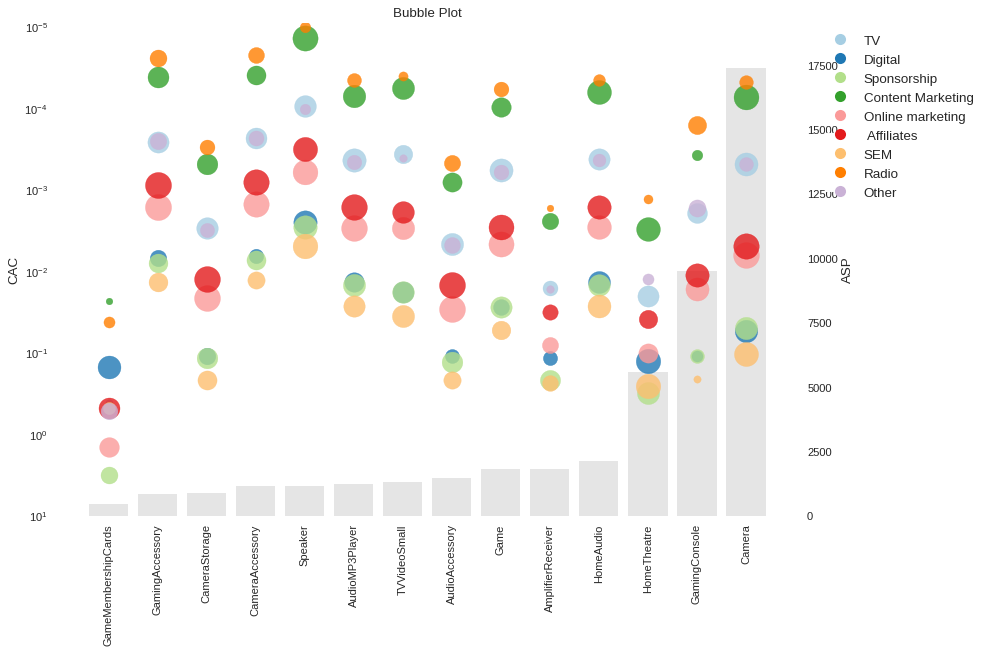

In [ ]:
# ASP (Average Selling Price)
# (GMV) / (units)

# ASP에 가장 큰 기여를 하는 제품종류는 카메라 이다.
# 카메라에서 CAC가 낮은 광고는 라디오 이다.
# 하지만, 상관계수를 고려했을 때 콘텐츠 마케팅이 더 적절하다.
# 따라서 ASP에 가장 효과적이면서 효율적인 광고는 '카메라, 콘텐츠 마케팅' 이다.

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.groupby([col], as_index=False).mean()
df_unique = df[[col, col_upper]].drop_duplicates()
df_cac = pd.merge(df_cac, df_unique[[col, col_upper]], on=col, how='inner')

df_asp = df.groupby([col], as_index=False)['gmv'].sum()
df_asp['units'] = df.groupby([col], as_index=False)['units'].sum()['units']
df_asp['asp'] = df_asp['gmv'] / df_asp['units']
df_cac = pd.merge(df_cac, df_asp[[col, 'asp']], on=col, how='inner')
df_cac = df_cac[[col, col_upper, 'asp', *medias]].drop_duplicates()
df_cac = df_cac.sort_values(by='asp', ascending=True)

correlation_results = {}
for cat in cats:
    correlations = {}
    df_cat_temp = df_temp2[df_temp2[col] == cat]
    df_cat_temp = pd.merge(df_temp, df_cat_temp[['Date_1', 'cust_id']], on='Date_1', how='inner')
    for media in medias:
        investment = df_cat_temp[media].values
        new_customers = df_cat_temp['cust_id'].values
        correlation, _ = pearsonr(investment, new_customers)
        correlations[media] = correlation
    correlation_results[cat] = correlations

df_corr = pd.DataFrame(correlation_results)
df_corr = df_corr.stack().reset_index()
df_corr.columns = ['Media', 'Category', 'Correlation']

color_map = {media: plt.cm.Paired(i) for i, media in enumerate(medias)}
colors = pd.Series(medias).map(color_map)

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)
ax1.bar(x=df_cac[col], height=df_cac['asp'], color='gray', alpha=0.2)
ax1.set_ylabel('ASP', fontdict={'size': 12})
ax1.set_ylim(0, max(df_cac['asp']) * 1.1)
ax1.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
for media in medias:
    for sub_category in df_cac[col].unique():
        sub_category_data = df_cac[df_cac[col] == sub_category]
        correlation_value = df_corr[(df_corr['Category'] == sub_category) & (df_corr['Media'] == media)]['Correlation'].values[0]
        marker_size = 30 + (abs(correlation_value) * 600)
        ax2.scatter(x=[sub_category] * len(sub_category_data),
                    y=sub_category_data[media],
                    s=marker_size,
                    label=f"{sub_category} - {media}",
                    alpha=0.8,
                    color=color_map[media])
ax2.set_title('Bubble Plot', fontdict={'size': 12})
ax2.set_ylabel('CAC', fontdict={'size': 12})
ax2.set_xticks(df_cac[col])
ax2.set_xticklabels(df_cac[col], rotation=90, fontdict={'size': 12})
ax2.set_ylim(10e0, 9e-6)
ax2.set_yscale('log')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[media], markersize=10)
           for media in medias]
ls_medias = list(medias)
ax1.legend(handles=handles, labels=ls_medias, loc='upper left', fontsize=12, bbox_to_anchor=(1.02, 1))
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.show()

### 수익률

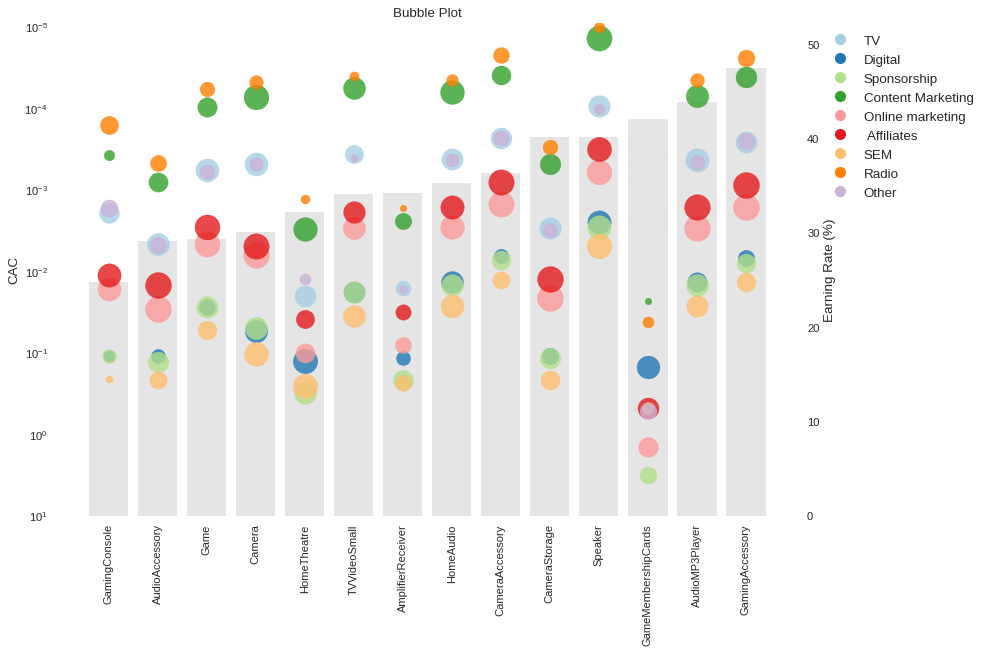

In [ ]:
# 수익률
# (순수익, MRP의 20%로 가정) / (GMV)

# 수익률에 가장 큰 기여를 하는 제품종류는 게이밍 악세사리 이다.
# 게이밍 악세사리에서 CAC가 낮은 광고는 라디오 이다.
# 따라서 수익률에 가장 효과적이면서 효율적인 광고는 '게이밍 악세사리, 라디오' 이다.

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.groupby([col], as_index=False).mean()
df_unique = df[[col, col_upper]].drop_duplicates()
df_cac = pd.merge(df_cac, df_unique[[col, col_upper]], on=col, how='inner')

df_earn = df.groupby([col], as_index=False)['gmv'].sum()
df_earn['earn'] = df.groupby([col], as_index=False)['product_mrp'].sum()['product_mrp'] * 0.2
df_earn['earn_rate'] = df_earn['earn'] / df_earn['gmv'] * 100
df_cac = pd.merge(df_cac, df_earn[[col, 'earn_rate']], on=col, how='inner')
df_cac = df_cac[[col, col_upper, 'earn_rate', *medias]].drop_duplicates()
df_cac = df_cac.sort_values(by='earn_rate', ascending=True)

correlation_results = {}
for cat in cats:
    correlations = {}
    df_cat_temp = df_temp2[df_temp2[col] == cat]
    df_cat_temp = pd.merge(df_temp, df_cat_temp[['Date_1', 'cust_id']], on='Date_1', how='inner')
    for media in medias:
        investment = df_cat_temp[media].values
        new_customers = df_cat_temp['cust_id'].values
        correlation, _ = pearsonr(investment, new_customers)
        correlations[media] = correlation
    correlation_results[cat] = correlations

df_corr = pd.DataFrame(correlation_results)
df_corr = df_corr.stack().reset_index()
df_corr.columns = ['Media', 'Category', 'Correlation']

color_map = {media: plt.cm.Paired(i) for i, media in enumerate(medias)}
colors = pd.Series(medias).map(color_map)

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)
ax1.bar(x=df_cac[col], height=df_cac['earn_rate'], color='gray', alpha=0.2)
ax1.set_ylabel('Earning Rate (%)', fontdict={'size': 12})
ax1.set_ylim(0, max(df_cac['earn_rate']) * 1.1)
ax1.set_xticklabels(ax2.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()
for media in medias:
    for sub_category in df_cac[col].unique():
        sub_category_data = df_cac[df_cac[col] == sub_category]
        correlation_value = df_corr[(df_corr['Category'] == sub_category) & (df_corr['Media'] == media)]['Correlation'].values[0]
        marker_size = 30 + (abs(correlation_value) * 600)
        ax2.scatter(x=[sub_category] * len(sub_category_data),
                    y=sub_category_data[media],
                    s=marker_size,
                    label=f"{sub_category} - {media}",
                    alpha=0.8,
                    color=color_map[media])
ax2.set_title('Bubble Plot', fontdict={'size': 12})
ax2.set_ylabel('CAC', fontdict={'size': 12})
ax2.set_xticks(df_cac[col])
ax2.set_xticklabels(df_cac[col], rotation=90, fontdict={'size': 12})
ax2.set_ylim(10e0, 9e-6)
ax2.set_yscale('log')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[media], markersize=10)
           for media in medias]
ls_medias = list(medias)
ax1.legend(handles=handles, labels=ls_medias, loc='upper left', fontsize=12, bbox_to_anchor=(1.02, 1))
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.show()

### 고객만족

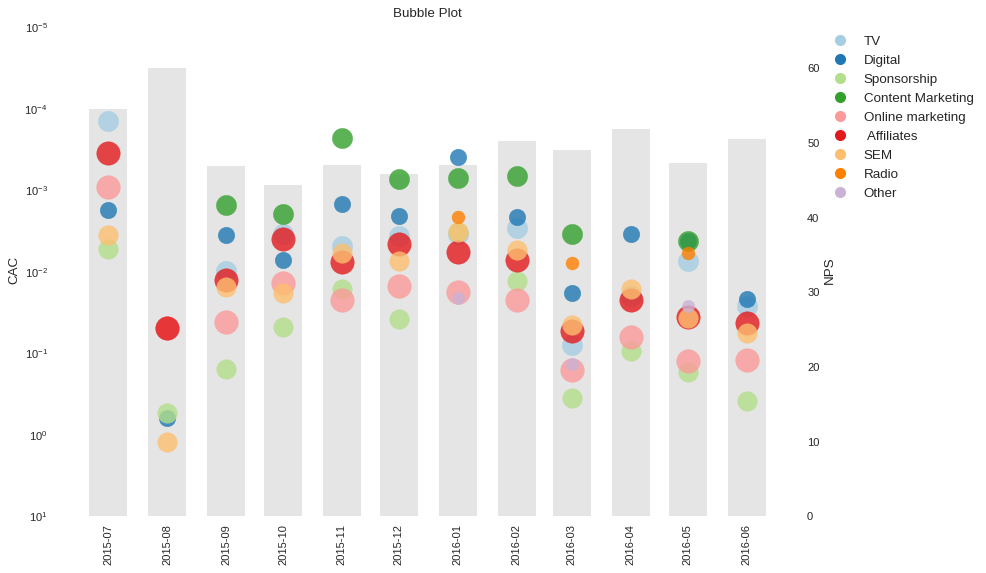

In [ ]:
# 고객만족
# 이게 해석이 좀 이상해서 적절한건지 모르겠음.
# 시간차원인거 다 빼고 제품종류인걸로 채우는게 나을듯?

df_cac = merged_df.copy()
for media in medias:
    df_cac[media] = df_cac[media] / df_cac['cust_id']
df_cac = df_cac.drop([col], axis=1)
df_cac = df_cac.groupby('Date_1', as_index=False).mean()

df_nps_temp = df_nps.copy()
df_nps_temp = df_nps_temp.T
df_nps_temp.columns = df_nps_temp.iloc[0]
df_nps_temp = df_nps_temp.drop(df_nps_temp.index[0])
df_nps_temp = df_nps_temp.reset_index()
df_nps_temp = df_nps_temp.rename(columns={'index': 'Date_1'})
date_mapping = {
    "July'15": "2015-07-01",
    "Aug'15": "2015-08-01",
    "Sept'15": "2015-09-01",
    "Oct'15": "2015-10-01",
    "Nov'15": "2015-11-01",
    "Dec'15": "2015-12-01",
    "Jan'16": "2016-01-01",
    "Feb'16": "2016-02-01",
    "Mar'16": "2016-03-01",
    "Apr'16": "2016-04-01",
    "May'16": "2016-05-01",
    "June'16": "2016-06-01"
}
df_nps_temp['Date_1'] = df_nps_temp['Date_1'].map(date_mapping)
df_nps_temp['Date_1'] = pd.to_datetime(df_nps_temp['Date_1'])
df_cac = pd.merge(df_cac, df_nps_temp[['Date_1', 'NPS']], on='Date_1', how='inner')
df_cac = df_cac[['Date_1', 'NPS', *medias]].drop_duplicates()

correlation_results = {}
for cat in cats:
    correlations = {}
    df_cat_temp = df_temp2[df_temp2[col] == cat]
    df_cat_temp = pd.merge(df_temp, df_cat_temp[['Date_1', 'cust_id']], on='Date_1', how='inner')
    for media in medias:
        investment = df_cat_temp[media].values
        new_customers = df_cat_temp['cust_id'].values
        correlation, _ = pearsonr(investment, new_customers)
        correlations[media] = correlation
    correlation_results[cat] = correlations

df_corr = pd.DataFrame(correlation_results)
df_corr = df_corr.stack().reset_index()
df_corr.columns = ['Media', 'Category', 'Correlation']

color_map = {media: plt.cm.Paired(i) for i, media in enumerate(medias)}
colors = pd.Series(medias).map(color_map)

fig, ax1 = plt.subplots(figsize=(12, 8), dpi=80)
ax1.bar(x=df_cac['Date_1'], height=df_cac['NPS'], color='gray', alpha=0.2, width=20)
ax1.set_ylabel('NPS', fontdict={'size': 12})
ax1.set_ylim(0, max(df_cac['NPS']) * 1.1)
new_labels = [str(tick.get_text())[:7] for tick in ax2.get_xticklabels()]
ax1.set_xticklabels(new_labels, rotation=90)

ax2 = ax1.twinx()
for media in medias:
    for sub_date in df_cac['Date_1'].unique():
        sub_date_data = df_cac[df_cac['Date_1'] == sub_date]
        correlation_value = df_corr[(df_corr['Media'] == media)]['Correlation'].mean()
        marker_size = 30 + (abs(correlation_value) * 600)
        ax2.scatter(x=[sub_date] * len(sub_date_data),
                    y=sub_date_data[media],
                    s=marker_size,
                    label=f"{sub_date} - {media}",
                    alpha=0.8,
                    color=color_map[media])
ax2.set_title('Bubble Plot', fontdict={'size': 12})
ax2.set_ylabel('CAC', fontdict={'size': 12})
ax2.set_xticks(df_cac['Date_1'])
ax2.set_xticklabels(new_labels, rotation=90, fontdict={'size': 12})
ax2.set_ylim(10e0, 9e-6)
ax2.set_yscale('log')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[media], markersize=10)
           for media in medias]
ls_medias = list(medias)
ax1.legend(handles=handles, labels=ls_medias, loc='upper left', fontsize=12, bbox_to_anchor=(1.02, 1))
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.grid(False)
ax2.grid(False)
ax1.set_facecolor('white')
ax2.set_facecolor('white')
plt.show()

In [ ]:
# 전환율(conversion rate) = 불가능, 방문자수가 없음
# 고객만족 = x축 시간차원, 분자에 NPS
# 잔존율(retention rate) = x축 시간차원, 분자에 재방문자수